# &nbsp; Supervised ML: Predicting housing prices (Phase1: Classification)
- Iteration 3: One-hot encoding

So far, we have been only using numerical features for our model. By not using the categorical features, we were missing out on a lot of potentially important information.

As we will see, converting categorical features to numerical (so that they can be "digested" by the Scikit-Learn transformers and models) adds a bit of complexity to the modelling pipeline. This is why in this notebook we will start by encoding them without using pipelines (just to understand what's going) and only later we will include categorical encoding inside the pipeline.

## 0.&nbsp; Understanding the datasets

**Dataset variables:**

*   LotArea --> Lot size in square feet
*   LotFrontage  -->  Linear feet of street connected to property
*   TotalBsmtSF  -->  Total square feet of basement area
*   BedroomAbvGr -->  Bedrooms above grade (does NOT include basement bedrooms)
*   Fireplaces   -->  Number of fireplaces
*   PoolArea     -->  Pool area in square feet
*   GarageCars   -->  Size of garage in car capacity
*   WoodDeckSF   -->  Wood deck area in square feet
*   ScreenPorch  -->  Screen porch area in square feet

* MSZoning  -->  Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

* Condition1  -->  Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

* Heating  -->  Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

* Street  -->  Type of road access to property

       Grvl	Gravel	
       Pave	Paved

* CentralAir  -->  Central air conditioning

       N	No
       Y	Yes

* Foundation  -->  Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

## 1.&nbsp; Data reading & splitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
# reading
url = "https://drive.google.com/file/d/1AxOCzCZWWM0KqdCTe4bwgQf_pW4E71gE/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

housing_data = pd.read_csv(path)

In [3]:
housing_data.sample(3)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
934,27650,313.0,585,4,1,0,2,0,0,0,RL,PosA,GasA,Pave,Y,CBlock
39,6040,65.0,0,2,0,0,0,0,0,0,RL,Norm,GasA,Pave,N,PConc
900,7340,NaN,858,2,0,0,1,0,0,0,RL,Norm,GasA,Pave,Y,CBlock


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
 10  MSZoning      1460 non-null   object 
 11  Condition1    1460 non-null   object 
 12  Heating       1460 non-null   object 
 13  Street        1460 non-null   object 
 14  CentralAir    1460 non-null   object 
 15  Foundation    1460 non-null   object 
dtypes: float64(1), int64(9), object(6)
memory usage: 182.6+ KB


- In the first step when building our `X`, we drop some columns for the sake of simplicity.
- We will "pop" the "target column", `y`, out from the rest of the data.

In [5]:
# X and y creation
X = housing_data.copy()
#X = housing_data.drop(columns=["Condition1", "Heating", "Street", "CentralAir", "Foundation"])
y = X.pop("Expensive")

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

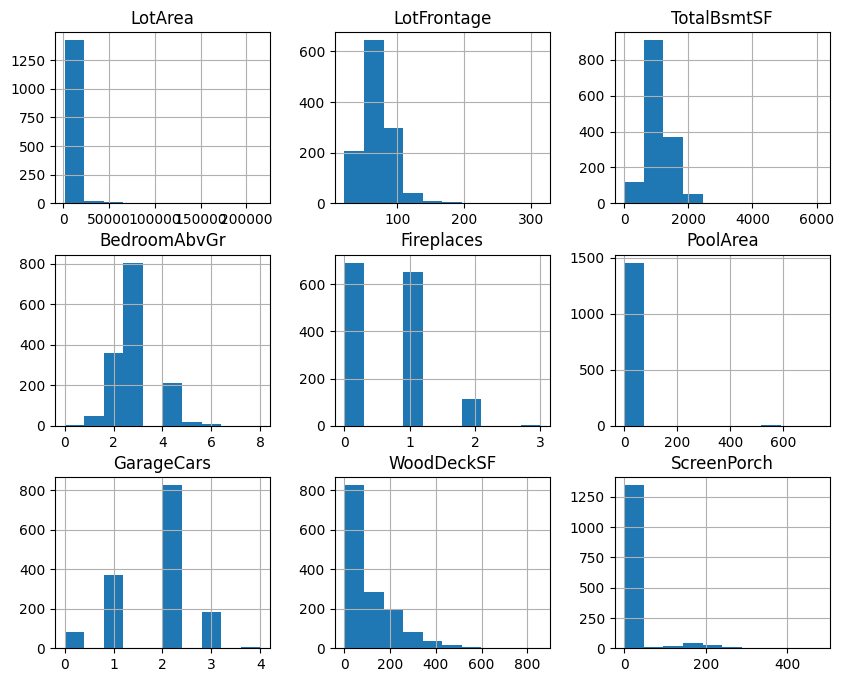

In [6]:
X.hist(figsize=(10, 8));

## 2.&nbsp; Categorical encoding - "MANUAL" approach  (Without using Pipelines)

### 2.1.&nbsp; Replacing NaNs

We will need two different strategies to deal with missing values in numerical and categorical features.

#### 2.1.1.&nbsp; Replacing NaNs in categorical features

We were imputing the mean to NaN’s on our preprocessing pipeline for numerical features. There's a problem with categorical values: they don’t have a “mean”. Here, we will replace NaNs with a string that marks them: “N_A”. It is not an elegant solution, but it will allow us to move forward.

In [7]:
# selecting non-numerical columns
X_train_cat = X_train.select_dtypes(exclude="number")

We don't have any missing value in categorical features. However, the code for that would be as follows:

In [8]:
# defining the imputer to use "N_A" as replacement value
#cat_imputer = SimpleImputer(strategy="constant",fill_value="N_A").set_output(transform='pandas')

# fitting and transforming
#X_cat_imputed = cat_imputer.fit_transform(X_train_cat)

#X_cat_imputed.head()

In [9]:
X_cat_imputed = X_train_cat.copy()

In [10]:
X_cat_imputed["MSZoning"].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH'], dtype=object)

In [11]:
X_cat_imputed.sample(3)

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
250,RL,Norm,GasA,Pave,Y,CBlock
1175,RL,Norm,GasA,Pave,Y,PConc
736,RL,Norm,GasA,Pave,N,CBlock


#### 2.1.2.&nbsp; Replacing NaNs in numerical features

This is what we already did in previous notebooks: replacing numerical NaNs with the mean of their column.

In [12]:
# Selecting numerical columns
X_train_num = X_train.select_dtypes(include="number")

# Imputing the mean
num_imputer = SimpleImputer(strategy="mean").set_output(transform='pandas')

# Fitting and transforming
X_num_imputed = num_imputer.fit_transform(X_train_num)

In [13]:
X_num_imputed.sample(3)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
579,12150.0,81.0,1050.0,4.0,0.0,0.0,1.0,0.0,0.0
861,11625.0,75.0,1039.0,3.0,0.0,0.0,2.0,0.0,0.0
758,2280.0,24.0,744.0,3.0,0.0,0.0,2.0,0.0,0.0


In [14]:
# Concatenating all columns
X_imputed = pd.concat([X_num_imputed, X_cat_imputed], axis=1)

X_imputed.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
318,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0,RL,Norm,GasA,Pave,Y,PConc
580,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0,RL,Norm,GasA,Pave,Y,CBlock
961,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0,RL,PosN,GasA,Pave,Y,CBlock
78,10778.0,72.00000,1768.0,4.0,0.0,0.0,0.0,0.0,0.0,RL,Norm,GasA,Pave,N,CBlock
5,14115.0,85.00000,796.0,1.0,0.0,0.0,2.0,40.0,0.0,RL,Norm,GasA,Pave,Y,Wood


In [15]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 318 to 1389
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   float64
 1   LotFrontage   1168 non-null   float64
 2   TotalBsmtSF   1168 non-null   float64
 3   BedroomAbvGr  1168 non-null   float64
 4   Fireplaces    1168 non-null   float64
 5   PoolArea      1168 non-null   float64
 6   GarageCars    1168 non-null   float64
 7   WoodDeckSF    1168 non-null   float64
 8   ScreenPorch   1168 non-null   float64
 9   MSZoning      1168 non-null   object 
 10  Condition1    1168 non-null   object 
 11  Heating       1168 non-null   object 
 12  Street        1168 non-null   object 
 13  CentralAir    1168 non-null   object 
 14  Foundation    1168 non-null   object 
dtypes: float64(9), object(6)
memory usage: 146.0+ KB


In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 147 to 352
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       292 non-null    int64  
 1   LotFrontage   222 non-null    float64
 2   TotalBsmtSF   292 non-null    int64  
 3   BedroomAbvGr  292 non-null    int64  
 4   Fireplaces    292 non-null    int64  
 5   PoolArea      292 non-null    int64  
 6   GarageCars    292 non-null    int64  
 7   WoodDeckSF    292 non-null    int64  
 8   ScreenPorch   292 non-null    int64  
 9   MSZoning      292 non-null    object 
 10  Condition1    292 non-null    object 
 11  Heating       292 non-null    object 
 12  Street        292 non-null    object 
 13  CentralAir    292 non-null    object 
 14  Foundation    292 non-null    object 
dtypes: float64(1), int64(8), object(6)
memory usage: 36.5+ KB


### 2.2.&nbsp; One Hot encoding

One Hot encoding means creating a new binary column for each category in every categorical column. Fortunately, a Scikit-Learn transformer takes care of everything.

#### 2.2.1.&nbsp; Fitting the `OneHotEncoder`

As with any transformer, we have to:
1. Import it
2. Initialize it
3. Fit it to the data
4. Use it to transform the data

In [17]:
# import
from sklearn.preprocessing import OneHotEncoder

# initialize
my_onehot = OneHotEncoder(drop="first",sparse_output=False).set_output(transform='pandas') # to understand what drop="first" does, look for MSZoning_C(all) in the dataframe below

# fit
my_onehot.fit(X_cat_imputed)

# transform
X_cat_imputed_onehot = my_onehot.transform(X_cat_imputed)

NOTE: If we leave `sparse_output=True`, the result will be a "sparse matrix": an object that Scikit-Learn creates when a matrix contains mostly zeros. In that case we would not be able to use `.set_output(transform='pandas')`.

In [18]:
X_cat_imputed_onehot.sample(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,...,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
920,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
885,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
902,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


We can see that all the columns contain either 0's or 1's. This is exactly how "one-hot" encoded columns (also called "dummy columns") look like: binary categories.

Each column has the name of the original column, an underscore and the name of the category:

- A column such as "Street", with only two categories, "Grvl" and "Pave", has become a single column, "Street_Pave", where `1` stands for "Pave" and `0` for "Grvl".

- A column such as "MSZoning", with many categories ('RL', 'RM', 'FV', 'C (all)', 'RH') has become as many columns as categories were (minus one), making the dataframe very wide and sparse.

In [19]:
X_cat_imputed_onehot.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Street_Pave',
       'CentralAir_Y', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood'],
      dtype='object')

#### 2.2.2.&nbsp; Concatenating "one-hot" columns with numerical columns:

Now that the categorical columns are numerical, we can join them back with the originally numerical columns and assemble the dataset that will be ready for modelling:

In [20]:
X_imputed = pd.concat([X_num_imputed, X_cat_imputed_onehot], axis=1)

X_imputed.head(3)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning_FV,...,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,CentralAir_Y,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
318,9900.0,90.00000,1347.0,4.0,1.0,0.0,3.0,340.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
580,14585.0,69.58427,1144.0,3.0,2.0,0.0,2.0,216.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
961,12227.0,69.58427,1330.0,4.0,1.0,0.0,2.0,550.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


## 3.&nbsp; Categorical encoding - "Automated" approach (Using Pipelines)

In the manual approach, to encode the categorical columns numerically, we have:

1. Selected the categorical columns.
2. Fitted a `OneHotEncoder` to them.
3. Transformed the categorical columns with the encoder.
4. Converted the sparse matrix into a dataframe.
5. Recovered the names of the columns.
6. Concatenated the one-hot columns with the numerical columns.

All these steps can be synthetised by using Scikit-Learn Pipelines and specifically something called `ColumnTransformer`, which allows us to apply different transformations to two or more groups of columns: in our case, categorical and numerical columns.

This process is also called creating "branches" in the pipeline. One branch for the categorical columns and another for the numerical columns. Each branch will contain as many transformers as we want. Then, the branches will meet again, and the transformed columns will be automatically concatenated. Let's see the process in action:

### 3.1.&nbsp; Creating the "numeric pipe" and the "categoric pipe"

In [21]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").columns
X_num_columns = X.select_dtypes(include="number").columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(sparse_output=False,handle_unknown='infrequent_if_exist',min_frequency=0.03)
)

### 3.2.&nbsp; Using `make_column_transformer` for a pipeline with 2 branches (the `preprocessor`)

We simply tell the pipeline the following:

- One branch will apply the steps in the `numeric_pipe` to the columns named in `X_num_columns`
- The second branch will apply the steps in the `categoric_pipe` to the columns named in `X_cat_columns`

In [22]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (numeric_pipe, X_num_columns),
    (categoric_pipe, X_cat_columns),
)

### 3.3.&nbsp; Creating the `full_pipeline` (`preprocessor` + Decision Tree)

Pipelines are modular. The `preprocessor` we created above with the `make_column_transformer` can become now a step in a new pipeline, that we'll call `full_pipeline` and will include, as a last step, a Decision Tree model:

In [23]:
full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

We can then fit this `full_pipeline` to the data:

In [24]:
# Notice that we did not fit the `preprocessor` before — we only fit the pipeline once it has been fully assembled.
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 min_frequency=0.03,
                                                                                 sparse_output=False))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

This full pipeline can make predictions, as can any other pipeline that ends with a model:

In [25]:
full_pipeline.predict(X_train)

array([1, 0, 1, ..., 1, 0, 0])

In [26]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "decisiontreeclassifier__max_depth": range(2, 16, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 16, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'dtree': np.float64(0.9186786985070248)}

### 3.4.&nbsp; Accessing steps of the pipeline

The estimators of a pipeline are stored as a list in the steps attribute, but can be accessed by index or name by indexing the Pipeline:

In [27]:
# first step in our pipeline is Simpleimputer

# we can access it with an index
full_pipeline[0]

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

In [28]:
# or by it's name
full_pipeline['columntransformer']

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.03,
                                                                sparse_output=False))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object'))])

`named_steps` helps you navigate through the pipeline.   
When using it, you get the autocompletion active after every step.  
With ``get_features_names_out()`` you can get printed column names that specific estimator used

In [29]:
(full_pipeline
 .named_steps.columntransformer
 .named_transformers_['pipeline-1']
 .named_steps.simpleimputer
 .get_feature_names_out()
 )

array(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr',
       'Fireplaces', 'PoolArea', 'GarageCars', 'WoodDeckSF',
       'ScreenPorch'], dtype=object)

In [30]:
(full_pipeline
 .named_steps.columntransformer
 .named_transformers_['pipeline-2']
 .named_steps.onehotencoder
 .get_feature_names_out()
 )

array(['x0_FV', 'x0_RL', 'x0_RM', 'x0_infrequent_sklearn', 'x1_Feedr',
       'x1_Norm', 'x1_infrequent_sklearn', 'x2_GasA',
       'x2_infrequent_sklearn', 'x3_Pave', 'x3_infrequent_sklearn',
       'x4_N', 'x4_Y', 'x5_BrkTil', 'x5_CBlock', 'x5_PConc',
       'x5_infrequent_sklearn'], dtype=object)

We can also get parameters out of any specific step, e.g. catogeries from onehotencoder step:

In [41]:
full_pipeline.named_steps.columntransformer.named_transformers_['pipeline-2'].named_steps.onehotencoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)]

### 3.5.&nbsp; Including the imputer to the GridSearchCV

If you want to include a parameter to the parameter grid you have to navigate through the pipe. For example, if one wants to include the SimpleImputer of the numerical pipe into the grid search the path to the SimpleImputer must be given. In this case the path is: **columntransformer-pipeline-1-simpleimputer**. One can see every step on the diagram of the pipe. Have in mind that in the parameter grid dictionary each step is distinguished one from another by the two lower dashes ("__")

In [51]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 16, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 16, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

best_param = search.best_params_

best_param

Fitting 5 folds for each of 98 candidates, totalling 490 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 9}

### 3.6.&nbsp; Check accuracy for the test set --> wrong

In [100]:
# 2. initialize the model (optional: give some parameters)
# my_tree = DecisionTreeClassifier()

In [101]:
# 3. fit the model to the train data
# my_tree.fit(X = X_imputed,
#            y = y_train)

DecisionTreeClassifier()

In [52]:
# make predictions
#y_pred_tree_train = my_tree.predict(X_imputed)
search.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0])

In [53]:
y_pred_tree_train = search.predict(X_train)

In [54]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

0.9306506849315068

In [55]:
# testing accuracy
y_test_pred_pipeline = search.predict(X_test)

accuracy_score(y_test, y_test_pred_pipeline)

0.9075342465753424

### **Exercise 1:**&nbsp;  Training a DecisionTree with GridSearch cross validation using the new Pipeline with branches

Here, we combine categorical encoding & branches using `GridSearchCV` for a whole Pipeline.

In [56]:
from sklearn.model_selection import GridSearchCV

#full_pipeline = make_pipeline(preprocessor,
#                              DecisionTreeClassifier())

# define parameter grid
param_grid = {
    "columntransformer__pipeline-1__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 16, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 16, 2)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

best_param = search.best_params_

best_param

Fitting 5 folds for each of 98 candidates, totalling 490 fits


{'columntransformer__pipeline-1__simpleimputer__strategy': 'mean',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 9}

In [57]:
y_pred_tree_train = search.predict(X_train)

# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )


0.9306506849315068

In [58]:
# testing accuracy
y_test_pred_pipeline = search.predict(X_test)

accuracy_score(y_test, y_test_pred_pipeline)

0.9075342465753424